# Dataset

#### *Dataset: Hitters*
#### *Sport Art: Baseball*
#### *Description: We have some baseball players with their season '86 and also career statistics. And the most important data for the dataset, Salary is from Sports Illustrated.<br> Steps are gonna be like this: Firstly, we check the dataset if there is missing values or some outliers. And then we create some features.<br> Modelling part is gonna be with Linear Regression and we get the Test, Train scores.<br> At the end with our Model we try to predict salaries from baseball players, that they have no information about their salaries.*<br>

##### *Columns of Dataset:*

* ***AtBat:*** Number of times at bat in 1986
* ***Hits:*** Number of hits in 1986
* ***HmRun:*** Number of home runs in 1986
* ***Runs:*** Number of runs in 1986
* ***RBI:*** Number of runs batted in in 1986
* ***Walks:*** Number of walks in 1986
* ***Years:*** Number of years in the major leagues
* ***CAtBat:*** Number of times at bat during his career
* ***CHits:*** Number of hits during his career
* ***CHmRun:*** Number of home runs during his career
* ***CRuns:*** Number of runs during his career
* ***CRBI:*** Number of runs batted in during his career
* ***CWalks:*** Number of walks during his career
* ***League:*** A factor with levels A and N indicating player’s league at the end of 1986
* ***Division:*** A factor with levels E and W indicating player’s division at the end of 1986
* ***PutOuts:*** Number of put outs in 1986
* ***Assists:*** Number of assists in 1986
* ***Errors:*** Number of errors in 1986
* ***Salary:*** 1987 annual salary on opening day in thousands of dollars
* ***NewLeague:*** A factor with levels A and N indicating player’s league at the beginning of 1987

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Import Dataset & Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hitters/Hitters.csv


In [3]:
df_ = pd.read_csv("/kaggle/input/hitters/Hitters.csv")

In [4]:
df = df_.copy()

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Dataset Preprocessing

In [5]:
def check_df(dataframe, head=5, tail=3):
    print("######################## Shape ########################\n")
    print(dataframe.shape)
    print("######################## Types ########################\n")
    print(dataframe.dtypes)
    print("######################## Head ########################\n")
    print(dataframe.head(head))
    print("######################## Tail ########################\n")
    print(dataframe.tail(tail))
    print("######################## NA ########################\n")
    print(dataframe.isnull().sum())
    print("\n\n######################## Quantiles ########################\n")
    print(dataframe.describe([0.05, 0.50, 0.75, 0.95, 0.99]).T)

check_df(df)

######################## Shape ########################

(322, 20)
######################## Types ########################

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
######################## Head ########################

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414  

In [6]:
# As we see, Salary feature has some missing values.
# Firstly we drop all missing values and convert the categoric columns to binary.

df1 = df.dropna()
df1 = pd.get_dummies(df1, columns = ["League","Division","NewLeague"], drop_first = True)

df2 = df1.copy()

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Parameters
    ------
        dataframe: dataframe

        cat_th: int, optional
                The limit value of numerical but categorical columns
                
        car_th: int, optional
                The limit value of categorical but cardinal columns

    Returns
    ------
        cat_cols: list
                Categrical columns
        num_cols: list
                Numerical columns
        cat_but_car: list
                Categorical but cardinal columns

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = Total columns
        num_but_cat is in cat_cols. It is just for info.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df2)

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 3


In [8]:
# Checking which columns has skewness...

df2.skew(axis = 0, skipna = True)
skew_cols = df2.skew(axis = 0, skipna = True)[(df2.skew(axis = 0, skipna = True) > 1) |
                                             (df2.skew(axis = 0, skipna = True) < -1)].index

In [9]:
skew_cols

Index(['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Salary'], dtype='object')

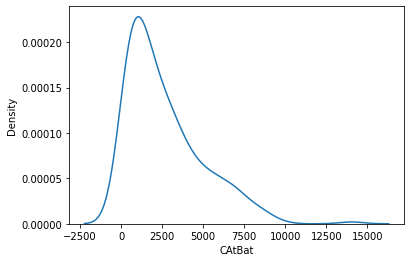

In [10]:
# Take a one column with skewness and check the histogram graphic. After that we convert that columns to logaritmic.

sns.distplot(df1["CAtBat"], hist=False);

In [11]:
for col in skew_cols:
    df2[col] = np.log(df2[col])

# We get some NaN und -inf values, because log0 is undefined.
# We can put for theese values again 0.

df2.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,8.146,6.727,4.234,5.771,6.026,5.927,6.449,3.761,10,6.163,1,1,1
2,479,130,18,66,72,76,3,7.393,6.125,4.143,5.412,5.583,5.572,6.780,4.407,14,6.174,0,1,0
3,496,141,20,65,78,37,11,8.636,7.362,5.416,6.719,6.731,5.869,5.298,2.398,3,6.215,1,0,1
4,321,87,10,39,42,30,2,5.981,4.615,2.485,3.871,3.829,3.497,6.691,3.689,4,4.516,1,0,1
5,594,169,4,74,51,35,11,8.391,7.033,2.944,6.217,5.817,5.268,5.642,6.043,25,6.620,0,1,0
6,185,37,1,23,8,21,2,5.366,3.738,0.000,3.401,2.197,3.178,4.331,4.844,7,4.248,1,0,0
7,298,73,0,24,24,7,3,6.232,4.682,-inf,3.714,3.611,2.485,4.796,5.645,9,4.605,0,1,0
8,323,81,6,26,32,8,2,5.832,4.454,1.792,3.466,3.526,2.079,4.963,5.670,19,4.317,1,1,1
9,401,92,17,49,66,65,13,8.558,7.194,5.533,6.664,6.791,6.764,-inf,-inf,0,7.003,0,0,0
10,574,159,21,107,75,59,10,8.441,7.170,4.500,6.554,6.223,6.190,5.472,6.098,22,6.248,0,0,0


In [12]:
num_cols = [col for col in num_cols if col not in "Salary"]

# Seperate as dataset the numeric, categoric columns and the "Salary" column.
numeric_df = df2.loc[:, num_cols]
cat_df = df2.loc[:, cat_cols]
y_df = df1.loc[:, "Salary"]

In [13]:
# Checking which column and which index has undefined value.

for col in num_cols:
    print(col, ": ", numeric_df[numeric_df[col].astype("str").str.get(1)=="i"].index)

AtBat :  Int64Index([], dtype='int64')
Hits :  Int64Index([], dtype='int64')
HmRun :  Int64Index([], dtype='int64')
Runs :  Int64Index([], dtype='int64')
RBI :  Int64Index([], dtype='int64')
Walks :  Int64Index([], dtype='int64')
Years :  Int64Index([], dtype='int64')
CAtBat :  Int64Index([], dtype='int64')
CHits :  Int64Index([], dtype='int64')
CHmRun :  Int64Index([7, 188, 239], dtype='int64')
CRuns :  Int64Index([], dtype='int64')
CRBI :  Int64Index([], dtype='int64')
CWalks :  Int64Index([], dtype='int64')
PutOuts :  Int64Index([9, 65, 132, 149, 186, 196, 198, 207, 249, 251, 267], dtype='int64')
Assists :  Int64Index([9, 65, 132, 149, 176, 186, 196, 198, 207, 249, 251, 255, 267, 304], dtype='int64')
Errors :  Int64Index([], dtype='int64')


In [14]:
index_CHmRun = numeric_df[numeric_df["CHmRun"].astype("str").str.get(1)=="i"].index
numeric_df.loc[index_CHmRun,"CHmRun"] = 0

index_PutOuts = numeric_df[numeric_df["PutOuts"].astype("str").str.get(1)=="i"].index.tolist()
numeric_df.loc[index_PutOuts,"PutOuts"] = 0

index_Assists = numeric_df[numeric_df["Assists"].astype("str").str.get(1)=="i"].index.tolist()
numeric_df.loc[index_Assists,"Assists"] = 0

In [15]:
df1.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000,0,1,0
6,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.000,1,0,0
7,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,100.000,0,1,0
8,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,75.000,1,1,1
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000,0,0,0
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22,517.143,0,0,0


In [16]:
# With just a little compare, as we see at the first dataset (df1)
# the values are 0 or totally less than others, which were in numeric_df dataset as undefined.
# That's why we filled all with 0 like as before.

numeric_df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,8.146,6.727,4.234,5.771,6.026,5.927,6.449,3.761,10
2,479,130,18,66,72,76,3,7.393,6.125,4.143,5.412,5.583,5.572,6.780,4.407,14
3,496,141,20,65,78,37,11,8.636,7.362,5.416,6.719,6.731,5.869,5.298,2.398,3
4,321,87,10,39,42,30,2,5.981,4.615,2.485,3.871,3.829,3.497,6.691,3.689,4
5,594,169,4,74,51,35,11,8.391,7.033,2.944,6.217,5.817,5.268,5.642,6.043,25
6,185,37,1,23,8,21,2,5.366,3.738,0.000,3.401,2.197,3.178,4.331,4.844,7
7,298,73,0,24,24,7,3,6.232,4.682,0.000,3.714,3.611,2.485,4.796,5.645,9
8,323,81,6,26,32,8,2,5.832,4.454,1.792,3.466,3.526,2.079,4.963,5.670,19
9,401,92,17,49,66,65,13,8.558,7.194,5.533,6.664,6.791,6.764,0.000,0.000,0
10,574,159,21,107,75,59,10,8.441,7.170,4.500,6.554,6.223,6.190,5.472,6.098,22


In [17]:
# LOF (Local Outlier Factor) Outlier Detection

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(numeric_df)
numeric_df_scores = clf.negative_outlier_factor_

np.sort(numeric_df_scores)[0:10]
outlier_indexes = numeric_df.loc[numeric_df_scores < -1.73878565]
index_drop = outlier_indexes.index.tolist()

numeric_df = numeric_df.drop(index = index_drop)
cat_df = cat_df.drop(index = index_drop)
cat_df = cat_df.reset_index(drop=True)
y_df = y_df.drop(index = index_drop)
y_df = y_df.reset_index(drop=True)

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Feature Engineering

In [18]:
# Percentages by Hits
numeric_df["New_Hits/AtBat"] = numeric_df["Hits"] / numeric_df["AtBat"]
numeric_df["New_HmRun/Hits"] = numeric_df["HmRun"] / numeric_df["Hits"]
numeric_df["New_Runs/Hits"] = numeric_df["Runs"] / numeric_df["Hits"]
numeric_df["New_RBI/Hits"] = numeric_df["RBI"] / numeric_df["Hits"]

numeric_df["New_CHits/CAtBat"] = numeric_df["CHits"] / numeric_df["CAtBat"]
numeric_df["New_CHmRun/CHits"] = numeric_df["CHmRun"] / numeric_df["CHits"]
numeric_df["New_CRuns/CHits"] = numeric_df["CRuns"] / numeric_df["CHits"]
numeric_df["New_CRBI/CHits"] = numeric_df["CRBI"] / numeric_df["CHits"]

# Career average statistics
numeric_df["New_CAtBat_mean"] = numeric_df["CAtBat"]/numeric_df["Years"]
numeric_df["New_CHits_mean"] = numeric_df["CHits"]/numeric_df["Years"]
numeric_df["New_CHmRun_mean"] = numeric_df["CHmRun"]/numeric_df["Years"]
numeric_df["New_CRBI_mean"] = numeric_df["CRBI"]/numeric_df["Years"]
numeric_df["New_CWalks_mean"] = numeric_df["CWalks"]/numeric_df["Years"]

# Benefits ans Loss
numeric_df["New_Errors/Walks"] = numeric_df["Errors"] / numeric_df["Walks"]
numeric_df["New_Benefit_Loss"] = numeric_df["Assists"] + numeric_df["PutOuts"] + numeric_df["Walks"] - numeric_df["Errors"]

# Advanced statistics
numeric_df["New_OBP"] = (numeric_df["Hits"] + numeric_df["Walks"] + (numeric_df["Hits"]/numeric_df["AtBat"])) / (numeric_df["AtBat"]+numeric_df["Walks"]+(numeric_df["Hits"]/numeric_df["AtBat"])+(numeric_df["RBI"]-numeric_df["Runs"]))
numeric_df["New_COBP"] = (numeric_df["CHits"] + numeric_df["CWalks"] + (numeric_df["CHits"]/numeric_df["CAtBat"])) / (numeric_df["CAtBat"]+numeric_df["CWalks"]+(numeric_df["CHits"]/numeric_df["CAtBat"])+(numeric_df["CRBI"]-numeric_df["CRuns"]))
numeric_df["New_SLG"] = ((4*numeric_df["HmRun"]) + numeric_df["Runs"])/numeric_df["AtBat"]
numeric_df["New_CSLG"] = ((4*numeric_df["CHmRun"]) + numeric_df["CRuns"])/numeric_df["CAtBat"]
numeric_df["New_COPS"] = numeric_df["New_COBP"] + numeric_df["New_CSLG"]
numeric_df["BABIP"] = (numeric_df["Hits"] - numeric_df["HmRun"]) / (numeric_df["AtBat"] - numeric_df["HmRun"] - numeric_df["Errors"] + (numeric_df["RBI"]-numeric_df["Runs"]))
numeric_df["New_ERA"] = numeric_df["Runs"] / ((numeric_df["Walks"]/numeric_df["Hits"]) * 9)
numeric_df["New_ERA"].fillna(0, inplace=True)
numeric_df["New_CERA"] = (numeric_df["CRuns"] / (numeric_df["CWalks"]/numeric_df["CHits"])) * 9
numeric_df["New_WHIP"] = (numeric_df["Walks"] + numeric_df["Hits"]) / (numeric_df["Walks"] / numeric_df["Hits"])
numeric_df["New_CWHIP"] = (numeric_df["CWalks"] + numeric_df["CHits"]) / (numeric_df["CWalks"] / numeric_df["CHits"])

In [19]:
# Scaler

numeric_df_columns = numeric_df.columns
standardized_numeric_df = preprocessing.scale(numeric_df)
standardized_numeric_df = pd.DataFrame(standardized_numeric_df, columns = numeric_df_columns)
standardized_numeric_df.head()

# New Dataset with categorical columns and "Salary"
df3 = pd.concat([standardized_numeric_df, cat_df, y_df], axis=1)
df3.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,New_Hits/AtBat,New_HmRun/Hits,New_Runs/Hits,New_RBI/Hits,New_CHits/CAtBat,New_CHmRun/CHits,New_CRuns/CHits,New_CRBI/CHits,New_CAtBat_mean,New_CHits_mean,New_CHmRun_mean,New_CRBI_mean,New_CWalks_mean,New_Errors/Walks,New_Benefit_Loss,New_OBP,New_COBP,New_SLG,New_CSLG,New_COPS,BABIP,New_ERA,New_CERA,New_WHIP,New_CWHIP,League_N,Division_W,NewLeague_N,Salary
0,-0.637,-0.624,-0.540,-1.239,-0.543,-0.113,1.391,0.675,0.567,0.517,0.318,0.659,0.798,0.964,0.108,0.211,-0.220,-0.322,-2.076,-0.077,0.264,0.414,-0.617,0.635,-0.800,-0.825,-0.715,-0.823,-0.809,-0.064,-0.107,-0.200,-0.600,-0.972,0.366,0.336,-0.343,-0.994,-0.075,-0.709,0.334,1,1,1,475.000
1,0.504,0.483,0.722,0.431,0.788,1.611,-0.912,-0.091,-0.018,0.451,-0.026,0.257,0.469,1.212,0.453,0.815,0.270,0.450,0.026,0.516,0.340,0.687,0.054,0.899,0.662,0.768,1.443,0.976,1.093,-0.294,1.447,0.861,-0.349,0.504,0.663,0.642,-0.074,-0.474,-0.598,-0.359,-0.377,0,1,0,480.000
2,0.622,0.731,0.951,0.391,1.022,-0.206,0.763,1.173,1.184,1.384,1.224,1.301,0.745,0.102,-0.620,-0.847,0.711,0.500,-0.439,0.512,1.042,1.031,0.814,0.943,-0.642,-0.632,-0.335,-0.595,-0.663,-0.623,0.007,-0.205,0.321,0.555,1.162,1.169,-0.028,0.636,1.555,0.747,1.388,1,0,1,500.000
3,-0.596,-0.489,-0.196,-0.642,-0.386,-0.532,-1.122,-1.527,-1.484,-0.764,-1.499,-1.340,-1.457,1.145,0.070,-0.696,0.257,0.101,-0.565,0.019,-1.321,-0.115,-1.115,-0.462,1.071,1.039,1.166,1.043,0.948,-0.457,-0.236,-0.084,-1.265,0.000,-0.397,-0.453,-0.043,-0.473,-1.326,-0.403,-1.391,1,0,1,91.500
4,1.304,1.364,-0.884,0.749,-0.034,-0.299,0.763,0.925,0.864,-0.428,0.743,0.469,0.186,0.359,1.327,2.478,0.720,-1.252,-0.669,-1.249,0.621,-0.810,0.064,-0.502,-0.660,-0.663,-0.784,-0.699,-0.735,1.394,-0.908,0.069,0.859,-1.134,-0.660,-0.616,1.454,1.539,1.444,1.787,1.305,0,1,0,750.000


In [20]:
cat_cols, num_cols, cat_but_car = grab_col_names(df3)

Observations: 261
Variables: 45
cat_cols: 3
num_cols: 42
cat_but_car: 0
num_but_cat: 3


<hr style="height:2px;border-width:0;color:white;background-color:green">

# Modelling

In [21]:
y = df3["Salary"]
X = df3.drop(["Salary"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=46)

models = []

models.append(('Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(("LightGBM", LGBMRegressor()))

for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)

Regression 240.27284962222905
Ridge 233.96786308647773
Lasso 232.8269800556364
ElasticNet 241.92173036672048
KNN 207.9206807790785
CART 301.75434867370274
RF 197.72175919070787
SVR 329.3716865694426
LightGBM 183.39981563143175


In [22]:
# The best score is from Light GBM and we're gonna go on with LGBM.

lgbm_model = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

183.39981563143175

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Model Optimization with LGBM

In [23]:
# Model Optimization

# I tried this parameters:
# lgbm_params = {"learning_rate": [0.001, 0.005, 0.01, 0.1],
               # "n_estimators": [200, 300, 400, 500, 800],
               # "max_depth": [2, 3, 5, 8, 10],
               # "num_leaves": [4, 6, 8, 10, 15],
               # "colsample_bytree": [0.4, 0.5, 0.8, 1]}

# Best paramaters:
lgbm_params = {
"learning_rate": [0.01],
"n_estimators": [800],
"max_depth": [2],
"num_leaves": [4],
"colsample_bytree": [1]
}

In [24]:
lgbm_cv_model = GridSearchCV(lgbm_model,
                             lgbm_params,
                             cv = 10,
                             n_jobs = -1,
                             verbose = False).fit(X_train, y_train)

In [25]:
tuned_lgbm = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = tuned_lgbm.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

180.90872377938538

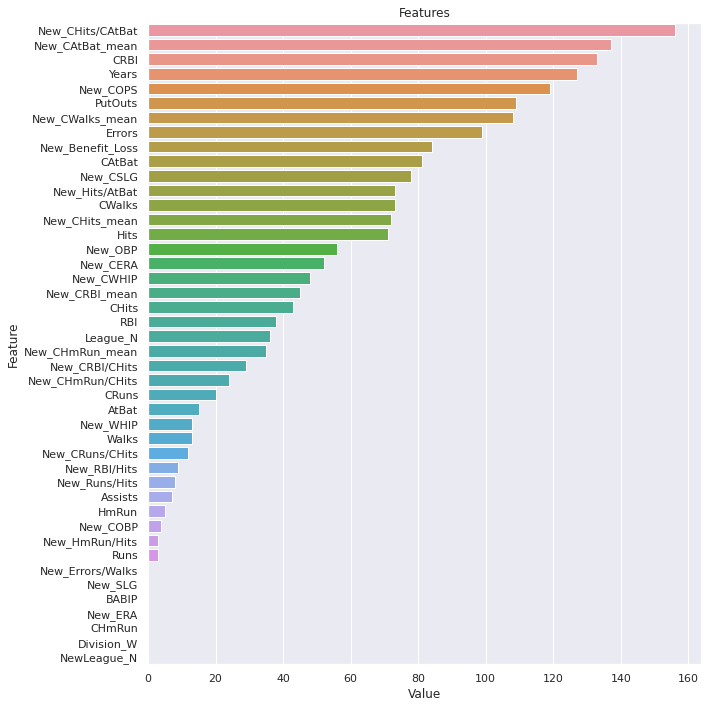

In [26]:
# Variable Importance

def plot_importance(model, features, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(tuned_lgbm, X)